- **Nama:** [Dhimas Sena Rahmantara]
- **Email:** [dhimassr@gmail.com]

In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
titanic_df.duplicated().sum()

0

In [9]:
titanic_df["Cabin"] = titanic_df["Cabin"].fillna("No Cabin")

In [11]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("Another City")

In [13]:
titanic_df["Age"] = titanic_df["Age"].fillna(math.ceil(titanic_df['Age'].mean()))

In [15]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
def survived_conv(x):
    if x == 0:
        return "No"
    elif x == 1:
        return "Yes"

titanic_df["Survived_str"] = titanic_df["Survived"].apply(survived_conv)

In [21]:
titanic_df.value_counts("Survived")

Survived
0    549
1    342
Name: count, dtype: int64

In [23]:
titanic_df.value_counts("Survived_str")

Survived_str
No     549
Yes    342
Name: count, dtype: int64

In [25]:
titanic_df.value_counts("Sex")

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
def pclass_conv(x):
    if x == 1:
        return "1st (Upper)"
    elif x == 2:
        return "2nd (Middle)"
    elif x == 3:
        return "3rd (Lower)"

titanic_df["Pclass_str"] = titanic_df["Pclass"].apply(pclass_conv)

In [29]:
titanic_df.value_counts("Pclass")

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [31]:
titanic_df.value_counts("Pclass_str")

Pclass_str
3rd (Lower)     491
1st (Upper)     216
2nd (Middle)    184
Name: count, dtype: int64

In [33]:
for i in range (0, len(titanic_df["Embarked"]), 1):
    if (titanic_df["Embarked"][i] == "C"):
        titanic_df.loc[i, "Embarked_str"] = "Cherbourg"
    elif (titanic_df["Embarked"][i] == "Q"):
        titanic_df.loc[i, "Embarked_str"] = "Queenstown"
    elif (titanic_df["Embarked"][i] == "S"):
        titanic_df.loc[i, "Embarked_str"] = "Southampton"
    else:
        titanic_df.loc[i, "Embarked_str"] = "Another City"

In [35]:
titanic_df.value_counts("Embarked_str")

Embarked_str
Southampton     644
Cherbourg       168
Queenstown       77
Another City      2
Name: count, dtype: int64

In [37]:
titanic_df.value_counts("Embarked")

Embarked
S               644
C               168
Q                77
Another City      2
Name: count, dtype: int64

In [39]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_str,Pclass_str,Embarked_str
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Cabin,S,No,3rd (Lower),Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,1st (Upper),Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,S,Yes,3rd (Lower),Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,1st (Upper),Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Cabin,S,No,3rd (Lower),Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,No Cabin,S,No,2nd (Middle),Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Yes,1st (Upper),Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,No Cabin,S,No,3rd (Lower),Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Yes,1st (Upper),Cherbourg


In [41]:
survival_per_sex = titanic_df.groupby(["Sex", "Survived_str"]).count()
survival_per_sex["PassengerId"]

Sex     Survived_str
female  No               81
        Yes             233
male    No              468
        Yes             109
Name: PassengerId, dtype: int64

Text(42.824072145061734, 0.5, 'Count')

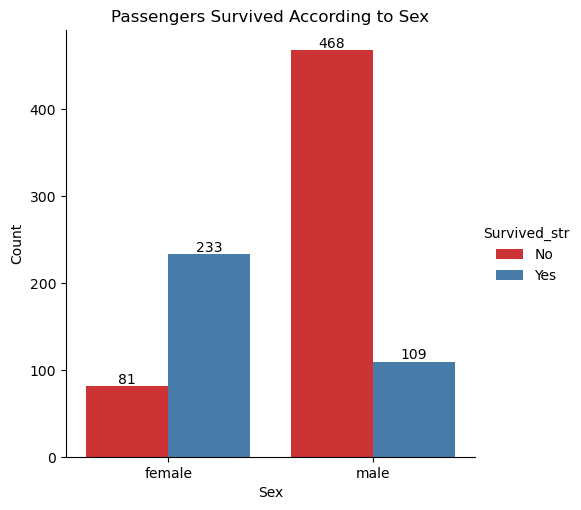

In [43]:
g = sns.catplot(
    data=survival_per_sex, kind="bar",
    x="Sex", y=survival_per_sex["PassengerId"], hue="Survived_str", palette="Set1", height=5
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

plt.title("Passengers Survived According to Sex")
plt.xlabel("Sex")
plt.ylabel("Count")


In [45]:
survival_per_pclass = titanic_df.groupby(["Pclass_str", "Survived_str"]).count()
survival_per_pclass["PassengerId"]

Pclass_str    Survived_str
1st (Upper)   No               80
              Yes             136
2nd (Middle)  No               97
              Yes              87
3rd (Lower)   No              372
              Yes             119
Name: PassengerId, dtype: int64

Text(42.824072145061734, 0.5, 'Count')

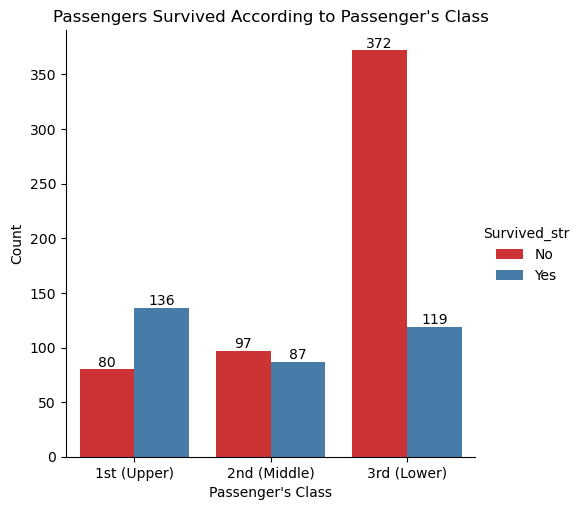

In [47]:
g = sns.catplot(
    data=survival_per_pclass, kind="bar",
    x="Pclass_str", y=survival_per_pclass["PassengerId"], hue="Survived_str", palette="Set1", height=5
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

plt.title("Passengers Survived According to Passenger's Class")
plt.xlabel("Passenger's Class")
plt.ylabel("Count")


In [61]:
survival_per_embarked = titanic_df.groupby(["Embarked_str", "Survived_str"]).count()
spe = survival_per_embarked["PassengerId"].reset_index()
spe.loc[len(spe.index)] = ["Another City", "No", 0]
spe.sort_values(by=["Embarked_str", "Survived_str"])

,Embarked_str,Survived_str,PassengerId
7,Another City,No,0
0,Another City,Yes,2
1,Cherbourg,No,75
2,Cherbourg,Yes,93
3,Queenstown,No,47
4,Queenstown,Yes,30
5,Southampton,No,427
6,Southampton,Yes,217


Text(42.824072145061734, 0.5, 'Count')

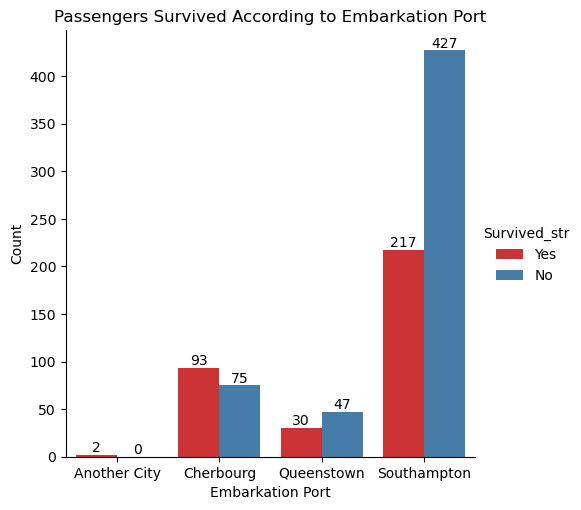

In [63]:
g = sns.catplot(
    data=spe, kind="bar",
    x="Embarked_str", y=spe["PassengerId"], hue="Survived_str", palette="Set1", height=5
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

plt.title("Passengers Survived According to Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Count")


In [81]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    object 
 11  Embarked      891 non-null    object 
 12  Survived_str  891 non-null    object 
 13  Pclass_str    891 non-null    object 
 14  Embarked_str  891 non-null    object 
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


In [160]:
for i in range(0, len(titanic_df["Age"]), 1):
    if (titanic_df["Age"][i] <= 1):
        titanic_df.loc[i, "Age_cat"] = "Infant (0-1)"
    elif (titanic_df["Age"][i] > 1 and titanic_df["Age"][i] <= 5):
        titanic_df.loc[i, "Age_cat"] = "Toddler (1-5)"
    elif (titanic_df["Age"][i] > 5 and titanic_df["Age"][i] <= 12):
        titanic_df.loc[i, "Age_cat"] = "Children (5-12)"
    elif (titanic_df["Age"][i] > 12 and titanic_df["Age"][i] <= 19):
        titanic_df.loc[i, "Age_cat"] = "Teenager (12-19)"
    elif (titanic_df["Age"][i] > 19 and titanic_df["Age"][i] <= 64):
        titanic_df.loc[i, "Age_cat"] = "Adult (19-64)"
    elif (titanic_df["Age"][i] > 64):
        titanic_df.loc[i, "Age_cat"] = "Elderly (> 64)"

In [178]:
survival_per_age_cat = titanic_df.groupby(["Age_cat", "Survived_str"]).count()
survival_per_age_cat = survival_per_age_cat.reset_index()
survival_per_age_cat["PassengerId"]

0     454
1     262
2      16
3       9
4      10
5       1
6       2
7      12
8      56
9      39
10     11
11     19
Name: PassengerId, dtype: int64

Text(37.64004509066358, 0.5, 'Count')

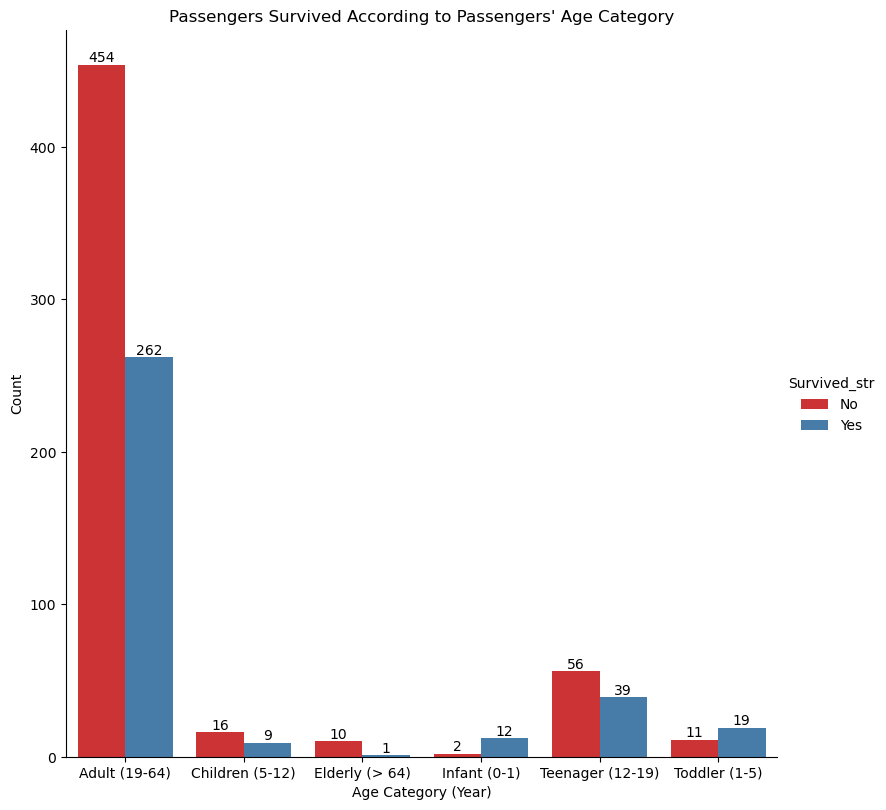

In [190]:
g = sns.catplot(
    data=survival_per_age_cat, kind="bar",
    x="Age_cat", y=survival_per_age_cat["PassengerId"], hue="Survived_str", palette="Set1", height=8
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

plt.title("Passengers Survived According to Passengers' Age Category")
plt.xlabel("Age Category (Year)")
plt.ylabel("Count")


In [257]:
for i in range(0, len(titanic_df["Fare"]), 1):
    if (titanic_df["Fare"][i] <= 50):
        titanic_df.loc[i, "Fare_cat"] = "Cheap (0-50)"
    elif (titanic_df["Fare"][i] > 50 and titanic_df["Fare"][i] <= 100):
        titanic_df.loc[i, "Fare_cat"] = "Middle (50-100)"
    elif (titanic_df["Fare"][i] > 100):
        titanic_df.loc[i, "Fare_cat"] = "Expensive (> 100)"
        

In [271]:
survival_per_fare_cat = titanic_df.groupby(["Fare_cat", "Survived_str"]).count()
survival_per_fare_cat = survival_per_fare_cat.reset_index()
survival_per_fare_cat["PassengerId"]

0    498
1    233
2     14
3     39
4     37
5     70
Name: PassengerId, dtype: int64

Text(42.824072145061734, 0.5, 'Count')

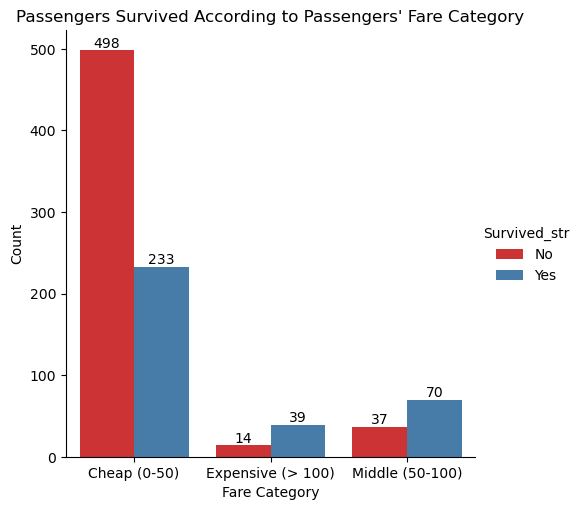

In [275]:
g = sns.catplot(
    data=survival_per_fare_cat, kind="bar",
    x="Fare_cat", y=survival_per_fare_cat["PassengerId"], hue="Survived_str", palette="Set1", height=5
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

plt.title("Passengers Survived According to Passengers' Fare Category")
plt.xlabel("Fare Category")
plt.ylabel("Count")


In [277]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_str,Pclass_str,Embarked_str,Age_cat,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Cabin,S,No,3rd (Lower),Southampton,Adult (19-64),Cheap (0-50)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,1st (Upper),Cherbourg,Adult (19-64),Middle (50-100)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,S,Yes,3rd (Lower),Southampton,Adult (19-64),Cheap (0-50)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,1st (Upper),Southampton,Adult (19-64),Middle (50-100)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Cabin,S,No,3rd (Lower),Southampton,Adult (19-64),Cheap (0-50)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,No Cabin,S,No,2nd (Middle),Southampton,Adult (19-64),Cheap (0-50)
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Yes,1st (Upper),Southampton,Teenager (12-19),Cheap (0-50)
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,No Cabin,S,No,3rd (Lower),Southampton,Adult (19-64),Cheap (0-50)
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Yes,1st (Upper),Cherbourg,Adult (19-64),Cheap (0-50)
